In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature
import knn
import d_knn
import randomforest
import gbrt
from project import plt_ant_feat

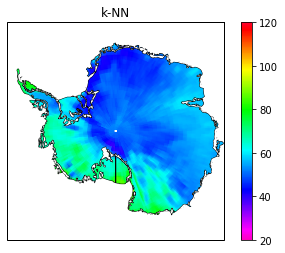

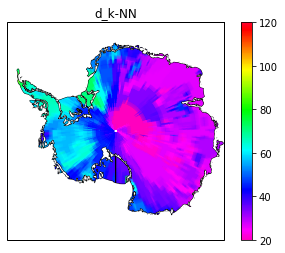

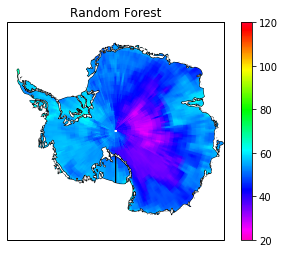

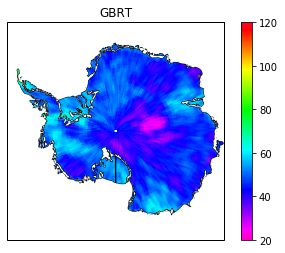

In [3]:
ant_data = pd.read_csv('data/ant_features.csv')

pred_dict = {}

models = [knn, d_knn, randomforest, gbrt]

for model in models:
    pred_dict[model.key] = model.pred(ant_data)
    plt_ant_feat(pred_dict[model.key], title=model.key)

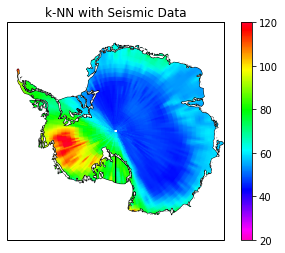

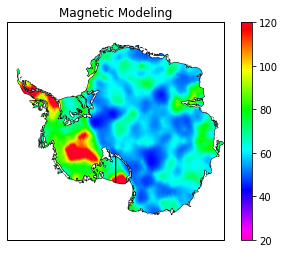

In [4]:
# Maps from the literature

# Shapiro
shapiro_data = pd.read_csv('data/shapiro_processed.csv')
plt_ant_feat(shapiro_data['GHF'].values.ravel(), title='k-NN with Seismic Data')

#Martos
x, y, z = np.loadtxt('data/Antarctic_GHF.xyz', unpack=True)
plt_ant_feat(z, x=x, y=y, ups=True, title='Magnetic Modeling')

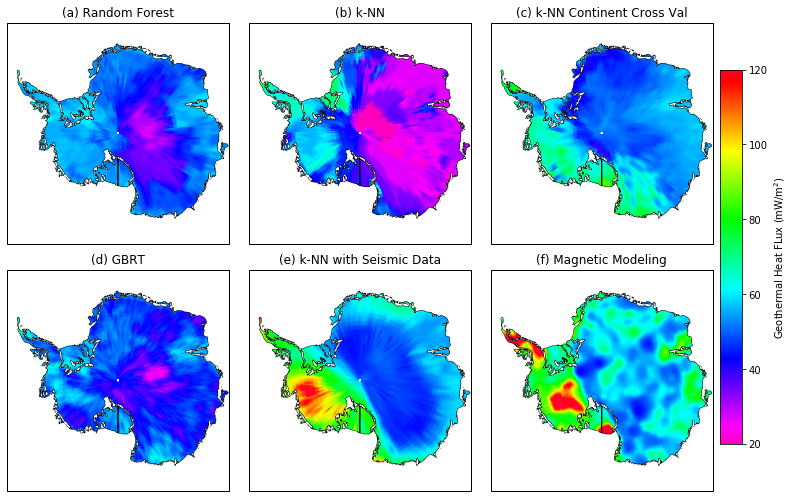

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6.5), subplot_kw=dict(projection=ccrs.SouthPolarStereo(), aspect='auto'))

ant_data = pd.read_csv('data/ant_features.csv')
shapiro_data = pd.read_csv('data/shapiro_processed.csv')
x, y, z = np.loadtxt('data/Antarctic_GHF.xyz', unpack=True)

plt_ant_feat(randomforest.pred(ant_data), fig=fig, ax=ax[0,0], colorbar=False, title='(a) Random Forest')
plt_ant_feat(d_knn.pred(ant_data), fig=fig, ax=ax[0,1], colorbar=False, title='(b) k-NN')
plt_ant_feat(knn.pred(ant_data), fig=fig, ax=ax[0,2], colorbar=False, title='(c) k-NN Continent Cross Val')
plt_ant_feat(gbrt.pred(ant_data), fig=fig, ax=ax[1,0], colorbar=False, title='(d) GBRT')
plt_ant_feat(shapiro_data['GHF'].values.ravel(), fig=fig, ax=ax[1,1], colorbar=False, title='(e) k-NN with Seismic Data')
mesh = plt_ant_feat(z, x=x, y=y, ups=True, fig=fig, ax=ax[1,2], colorbar=False, title='(f) Magnetic Modeling')

cbaxes = fig.add_axes([0.99, 0.1, 0.03, 0.8]) 
fig.colorbar(mesh, ax=ax[:,1], orientation='vertical', cax=cbaxes, label='Geothermal Heat FLux (mW/m$^2$)')
plt.subplots_adjust(wspace=0.09, hspace=.12, left=0, bottom=0, right=.98, top=1)
# plt.savefig('antarctica_predictions_full.pdf', bbox_inches="tight")

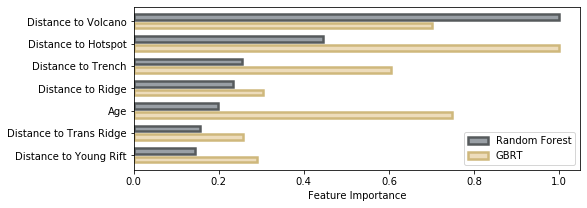

In [56]:
# Feature Importance
label_map = {'age':'Age',
             'bougeur_gravity_anomaly':'Bougeur Gravity Anomaly',
             'd_2_hotspot':'Distance to Hotspot',
             'd_2_ridge':'Distance to Ridge',
             'd_2_trans_ridge':'Distance to Trans Ridge',
             'd_2_trench':'Distance to Trench',
             'd_2_volcano':'Distance to Volcano',
             'd_2_young_rift':'Distance to Young Rift',
             'depth_to_moho':'Depth to Moho',
             'lithos_asthenos_bdry':'Lithosphere–asthenosphere Boundary',
             'magnetic_anomaly':'Magnetic Anomaly',
             'thickness_crust':'Crust Thickness',
             'thickness_middle_crust':'Middle Crust Thickness',
             'thickness_upper_crust':'Upper Crust Thickness',
             'topography':'Topography',
             'upper_mantle_density_anomaly':'Upper Mantle Density Anomaly',
             'upper_mantle_vel_structure':'Upper Mantle Vel Structure'}

max_features = 7

labels, rf_imp = randomforest.feature_importances()
labels, gbrt_imp = gbrt.feature_importances(ant_data)
sort_i = np.argsort(rf_imp)
labels = labels[sort_i][-max_features:]
rf_imp = rf_imp[sort_i][-max_features:]
gbrt_imp = gbrt_imp[sort_i][-max_features:]

y = np.arange(len(labels))
width = 0.25
adj = .07

fig, ax = plt.subplots(figsize=(8,3))
plt.barh(y + width/2+adj, rf_imp, width, label='Random Forest',  color='#999FA5', alpha=1, edgecolor='#565A5C', lw=2.5)
plt.barh(y - width/2-adj, gbrt_imp, width, label='GBRT', color='#EDDCBB', edgecolor='#CFB87C', lw=2.5)
ax.set_xlabel('Feature Importance')
ax.set_yticks(y)
ax.set_yticklabels([label_map[x] for x in labels])
ax.legend()

# plt.savefig('feature_importance.pdf', bbox_inches="tight")